In [1]:
# ensure classes imported from .py files are dynamically updated
%load_ext autoreload
%autoreload 2

# plot matplots nicely
%matplotlib inline  

In [2]:
import numpy as np
import pandas as pd
import datetime
import xarray as xr
from climate_drought import config, drought_indices as dri, utils
import matplotlib.pyplot as plt


C:\Users\eejco\pixalytics\Climate-drought\src\climate-indices\src\climate_indices\utils.py:149: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def reshape_to_2d(
C:\Users\eejco\pixalytics\Climate-drought\src\climate-indices\src\climate_indices\utils.py:199: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def reshape_to_divs_years_months(
C:\Users\eejco\pixalytics\C

In [3]:
# Set up analysis args
# pt = point, bb = bounding box, pn = polygon
cf = config.Config(outdir= 'output',indir='input',verbose=False)
aa_pt = config.AnalysisArgs(latitude=38.5,longitude=-119.5,start_date='20210121',end_date='20230531',oformat='cov')
aa_bb = config.AnalysisArgs(latitude=[38.5,40.5],longitude=[-119.5,-117.5],start_date='20210121',end_date='20230531')
aa_pn = config.AnalysisArgs(latitude=[38.5,40.5,38,38.5,38.5],longitude=[-119.5,-117.5,-118,-117.5,-116.5],start_date='20210121',end_date='20230531',oformat='cov')

In [57]:
# create cdi args, using already created args
caa_pn = config.CDIArgs(aa_pn.latitude,aa_pn.longitude,aa_pn.start_date,aa_pn.end_date,oformat='cov')
caa_bb = config.CDIArgs(aa_bb.latitude,aa_bb.longitude,aa_bb.start_date,aa_bb.end_date,oformat='csv')
caa_pt = config.CDIArgs(aa_pt.latitude,aa_pt.longitude,aa_pt.start_date,aa_pn.end_date)

In [58]:
# initialise a point, bounding box and polygon cdi
cdi_pt = dri.CDI(cf,caa_pt)
cdi_bb = dri.CDI(cf,caa_bb)
cdi_pn = dri.CDI(cf,caa_pn)

2023-06-19  11:06:45 INFO Successfully retrieved URL for GDO file with year: 2020, prod_code spg03
2023-06-19  11:06:45 INFO Successfully retrieved URL for GDO file with year: 2021, prod_code spg03
2023-06-19  11:06:45 INFO Successfully retrieved URL for GDO file with year: 2022, prod_code spg03
2023-06-19  11:06:45 INFO Successfully retrieved URL for GDO file with year: 2023, prod_code spg03
2023-06-19  11:06:46 INFO Successfully retrieved URL for GDO file with year: 2021, prod_code smant
2023-06-19  11:06:46 INFO Successfully retrieved URL for GDO file with year: 2022, prod_code smant
2023-06-19  11:06:46 INFO Couldn't retrieve URL for GDO file with year: 2023, prod_code smant
2023-06-19  11:06:46 INFO Successfully retrieved URL for GDO file with year: 2021, prod_code fpanv
2023-06-19  11:06:46 INFO Successfully retrieved URL for GDO file with year: 2022, prod_code fpanv
2023-06-19  11:06:47 INFO Successfully retrieved URL for GDO file with year: 2023, prod_code fpanv
2023-06-19  11:

In [59]:
# ensure data is downloaded
cdi_pt.download()
cdi_bb.download()
cdi_pn.download()

2023-06-19  11:06:55 INFO File already exists at: input/spg03/spg03_m_wld_20200101_20201201_m.nc
2023-06-19  11:06:55 INFO File already exists at: input/spg03/spg03_m_wld_20210101_20211201_m.nc
2023-06-19  11:06:55 INFO File already exists at: input/spg03/spg03_m_wld_20220101_20221201_m.nc
2023-06-19  11:06:55 INFO File already exists at: input/spg03/spg03_m_wld_20220101_20221101_m.nc
2023-06-19  11:06:55 INFO Could not download file: input/spg03/spg03_m_wld_20220101_20220801_m.nc
2023-06-19  11:06:55 INFO Error: HTTP Error 404: Not Found
2023-06-19  11:06:55 INFO File already exists at: input/spg03/spg03_m_wld_20230101_20230501_m.nc
2023-06-19  11:06:55 INFO File already exists at: input/smant/smant_m_wld_20210101_20211221_t.nc
2023-06-19  11:06:55 INFO File already exists at: input/smant/smant_m_wld_20220101_20221101_t.nc
2023-06-19  11:06:55 INFO Could not download file: input/smant/smant_m_wld_20220101_20220921_t.nc
2023-06-19  11:06:55 INFO Error: HTTP Error 404: Not Found
2023-06

[['input/spg03/spg03_m_wld_20200101_20201201_m.nc',
  'input/spg03/spg03_m_wld_20210101_20211201_m.nc',
  'input/spg03/spg03_m_wld_20220101_20221201_m.nc',
  'input/spg03/spg03_m_wld_20220101_20221101_m.nc',
  'input/spg03/spg03_m_wld_20230101_20230501_m.nc'],
 ['input/smant/smant_m_wld_20210101_20211221_t.nc',
  'input/smant/smant_m_wld_20220101_20221101_t.nc'],
 ['input/fpanv/fpanv_m_wld_20210101_20211221_t.nc',
  'input/fpanv/fpanv_m_wld_20220101_20221221_t.nc',
  'input/fpanv/fpanv_m_wld_20230101_20230521_t.nc']]

In [128]:
cdi_pt.process()
cdi_bb.process()
cdi_pn.process()

2023-06-19  14:50:15 INFO Computing Combined Drought Indicator...


Loading and trimmning data...
Filling gaps  in data...
Converting to dataframe...
Reducing to requested area...


2023-06-19  14:50:16 WARNING Outfile not written: already exists
2023-06-19  14:50:16 INFO Completed processing of ERA5 CDI data.
2023-06-19  14:50:16 INFO Computing Combined Drought Indicator...


Generating output...
Loading and trimmning data...
Filling gaps  in data...
Converting to dataframe...
Reducing to requested area...


2023-06-19  14:51:33 WARNING Outfile not written: already exists
2023-06-19  14:51:33 INFO Completed processing of ERA5 CDI data.
2023-06-19  14:51:33 INFO Computing Combined Drought Indicator...


Generating output...
Loading and trimmning data...
Filling gaps  in data...
Converting to dataframe...
Reducing to requested area...


2023-06-19  14:57:10 WARNING Outfile not written: already exists
2023-06-19  14:57:10 INFO Completed processing of ERA5 CDI data.


Generating output...


,latitude,longitude,time,spg03,smant,fpanv,CDI
0,38.5,-119.5,2020-12-01,-0.440,NaN,NaN,NaN
1,38.5,-119.5,2020-12-11,-0.440,NaN,NaN,NaN
2,38.5,-119.5,2020-12-21,-0.440,NaN,NaN,NaN
3,38.5,-119.5,2021-01-01,-0.082,-1.139524,NaN,NaN
4,38.5,-119.5,2021-01-11,-0.082,-1.182105,1.245636,NaN
...,...,...,...,...,...,...,...
1075,40.5,-116.5,2023-04-11,NaN,NaN,-0.913905,NaN
1076,40.5,-116.5,2023-04-21,NaN,NaN,-0.710098,NaN
1077,40.5,-116.5,2023-05-01,NaN,NaN,-0.639548,NaN
1078,40.5,-116.5,2023-05-11,NaN,NaN,-0.154643,NaN


(18552.95, 19522.05)

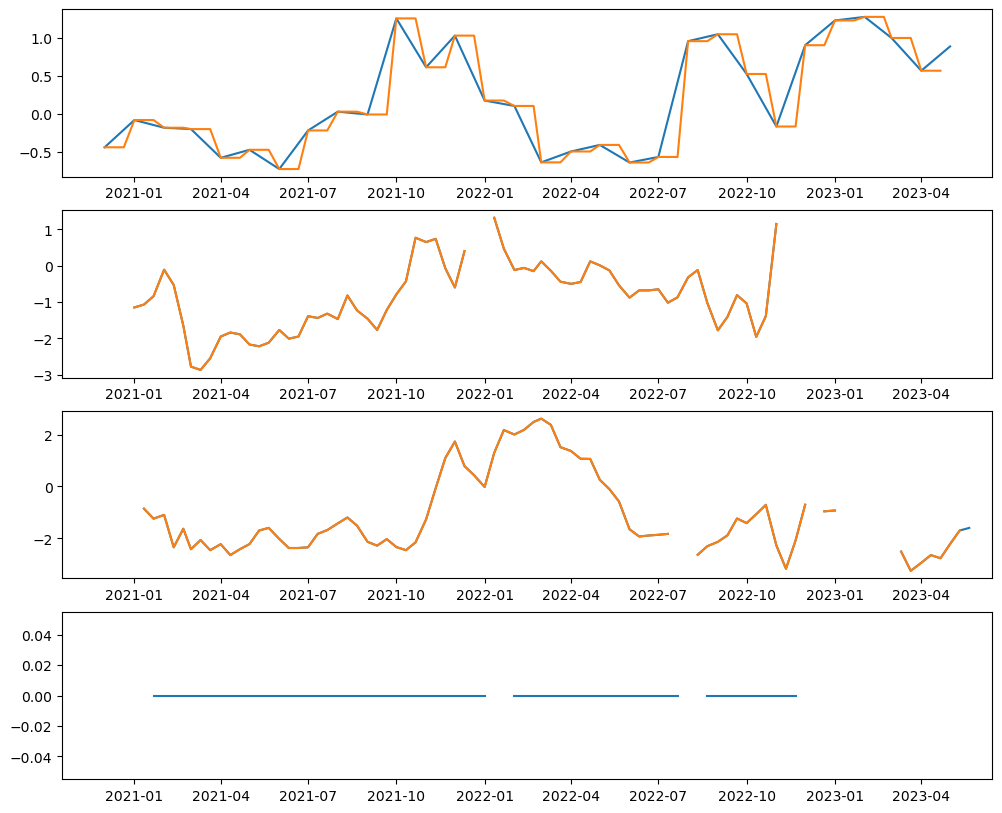

In [66]:
# check impact of time reindexing using point cdi
fig, axs = plt.subplots(4,1,figsize=(12,10))
spi_pre = cdi_pt.spi.data_ds.spg03.squeeze()
spi_pro = cdi_pt.data_ds.spg03.squeeze()
sma_pre = cdi_pt.sma.data_ds.smant.squeeze()
sma_pro = cdi_pt.data_ds.smant.squeeze()
fpr_pre = cdi_pt.fpr.data_ds.fpanv.squeeze()
fpr_pro = cdi_pt.data_ds.fpanv.squeeze()
cdi_pro = cdi_pt.data_ds.CDI.squeeze()
axs[0].plot(spi_pre.time,spi_pre)
axs[0].plot(spi_pro.time,spi_pro.shift({'time':-3}))
xg = axs[0].get_xlim()
axs[1].plot(sma_pre.time,sma_pre)
axs[1].plot(sma_pro.time,sma_pro.shift({'time':-2}))
axs[1].set_xlim(xg)
axs[2].plot(fpr_pre.time,fpr_pre)
axs[2].plot(fpr_pro.time,fpr_pro.shift({'time':-1}))
axs[2].set_xlim(xg)
axs[3].plot(cdi_pro.time,cdi_pro)
axs[3].set_xlim(xg)

(18552.95, 19522.05)

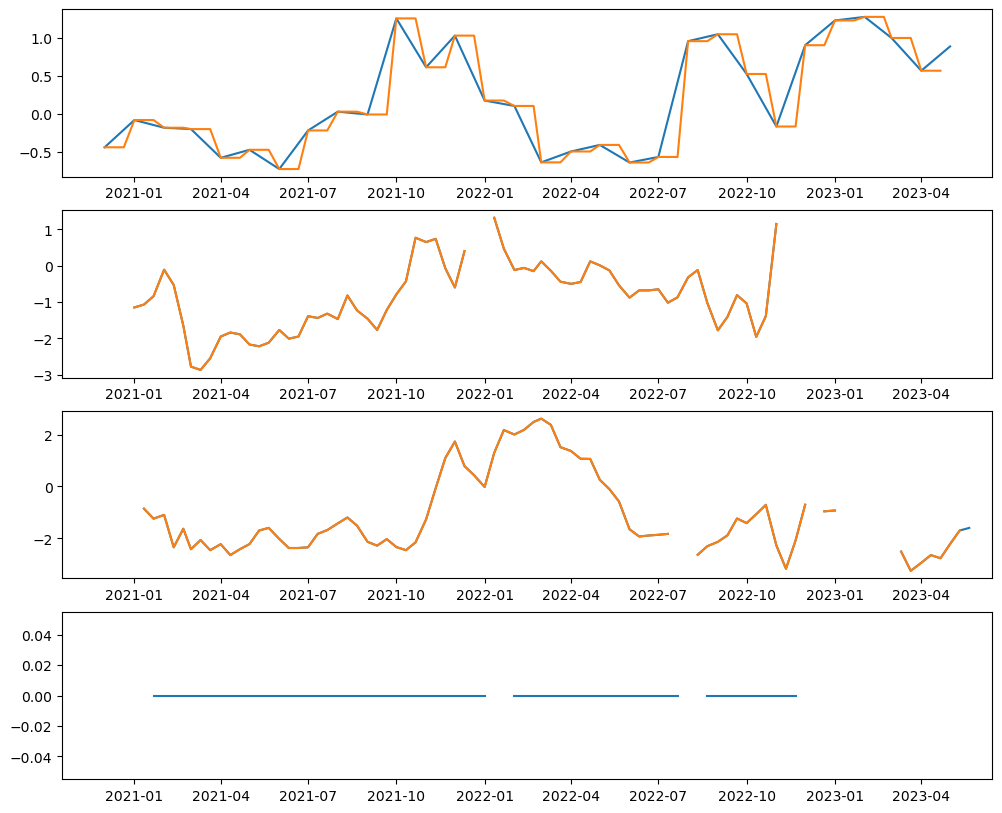

In [67]:
fig, axs = plt.subplots(4,1,figsize=(12,10))
spi_pre = cdi_bb.spi.data_ds.sel({'latitude':aa_pt.latitude,'longitude':aa_pt.longitude},method='nearest').spg03.squeeze()
spi_pro = cdi_bb.data_ds.sel({'latitude':aa_pt.latitude,'longitude':aa_pt.longitude},method='nearest').spg03.squeeze()
sma_pre = cdi_bb.sma.data_ds.sel({'latitude':aa_pt.latitude,'longitude':aa_pt.longitude},method='nearest').smant.squeeze()
sma_pro = cdi_bb.data_ds.sel({'latitude':aa_pt.latitude,'longitude':aa_pt.longitude},method='nearest').smant.squeeze()
fpr_pre = cdi_bb.fpr.data_ds.sel({'latitude':aa_pt.latitude,'longitude':aa_pt.longitude},method='nearest').fpanv.squeeze()
fpr_pro = cdi_bb.data_ds.sel({'latitude':aa_pt.latitude,'longitude':aa_pt.longitude},method='nearest').fpanv.squeeze()
cdi_pro = cdi_bb.data_ds.sel({'latitude':aa_pt.latitude,'longitude':aa_pt.longitude},method='nearest').CDI.squeeze()
axs[0].plot(spi_pre.time,spi_pre)
axs[0].plot(spi_pro.time,spi_pro.shift({'time':-3}))
xg = axs[0].get_xlim()
axs[1].plot(sma_pre.time,sma_pre)
axs[1].plot(sma_pro.time,sma_pro.shift({'time':-2}))
axs[1].set_xlim(xg)
axs[2].plot(fpr_pre.time,fpr_pre)
axs[2].plot(fpr_pro.time,fpr_pro.shift({'time':-1}))
axs[2].set_xlim(xg)
axs[3].plot(cdi_pro.time,cdi_pro)
axs[3].set_xlim(xg)

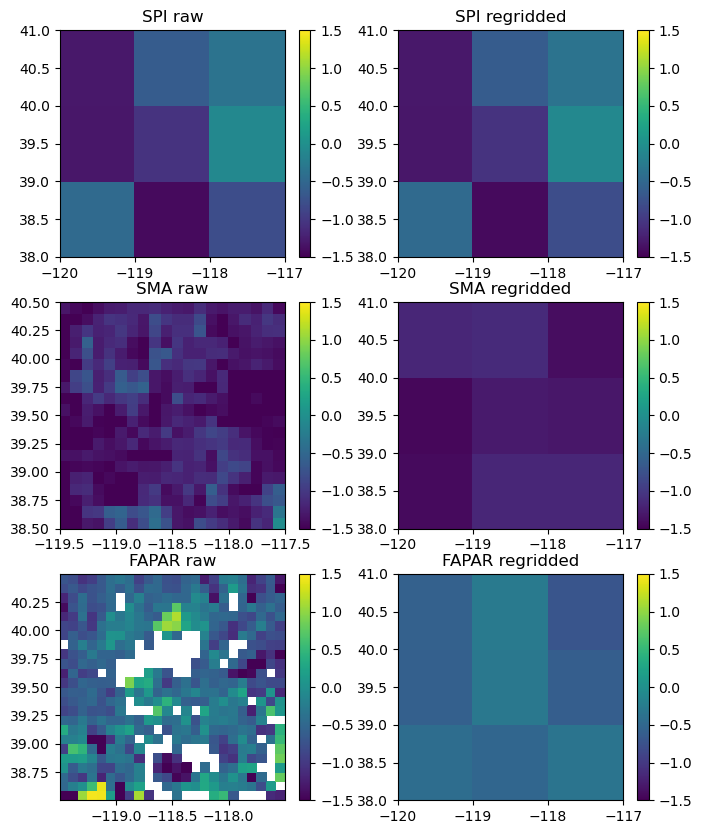

In [126]:
# check interpolation method using bbox data
t=pd.Timestamp(2021,5,1)

fig, axs = plt.subplots(3,2,figsize=(8,10))
spi_raw = cdi_bb.spi.data_ds.spg03.sel(time=t,method='nearest')
sma_raw = cdi_bb.sma.data_ds.smant.sel(time=t,method='nearest')
fpr_raw = cdi_bb.fpr.data_ds.fpanv.sel(time=t,method='nearest')
spi_pro = cdi_bb.data_ds.spg03.sel(time=t,method='nearest')
sma_pro = cdi_bb.data_ds.smant.sel(time=t,method='nearest')
fpr_pro = cdi_bb.data_ds.fpanv.sel(time=t,method='nearest')


def plot_regridded(ax,da,da2,title):
    c1=ax[0].pcolor(da.longitude,da.latitude,da,vmin=-1.5,vmax=1.5)
    c2=ax[1].pcolor(da2.longitude,da2.latitude,da2,vmin=-1.5,vmax=1.5)
    fig.colorbar(c1,ax=ax[0])
    fig.colorbar(c2,ax=ax[1])
    ax[0].set_title(title + ' raw')
    ax[1].set_title(title + ' regridded')

plot_regridded(axs[0],spi_raw,spi_pro,'SPI')
plot_regridded(axs[1],sma_raw,sma_pro,'SMA')
plot_regridded(axs[2],fpr_raw,fpr_pro,'FAPAR')




In [129]:
# check interpolation method using polygon data
t=pd.Timestamp(2021,5,1)

fig, axs = plt.subplots(3,2,figsize=(8,10))
spi_raw = cdi_pn.spi.data_ds.spg03.sel(time=t,method='nearest')
sma_raw = cdi_pn.sma.data_ds.smant.sel(time=t,method='nearest')
fpr_raw = cdi_pn.fpr.data_ds.fpanv.sel(time=t,method='nearest')
spi_pro = cdi_pn.data_ds.spg03.sel(time=t,method='nearest')
sma_pro = cdi_pn.data_ds.smant.sel(time=t,method='nearest')
fpr_pro = cdi_pn.data_ds.fpanv.sel(time=t,method='nearest')


def plot_regridded(ax,da,da2,title):
    da=da.where(da != dri.OUTSIDE_AREA_SELECTION,drop=True)
    da2=da2.where(da2 != dri.OUTSIDE_AREA_SELECTION,drop=True)
    c1=ax[0].pcolor(da.longitude,da.latitude,da,vmin=-1.5,vmax=1.5)
    c2=ax[1].pcolor(da2.longitude,da2.latitude,da2,vmin=-1.5,vmax=1.5)
    fig.colorbar(c1,ax=ax[0])
    fig.colorbar(c2,ax=ax[1])
    ax[0].set_title(title + ' raw')
    ax[1].set_title(title + ' regridded')

plot_regridded(axs[0],spi_raw,spi_pro,'SPI')
plot_regridded(axs[1],sma_raw,sma_pro,'SMA')
plot_regridded(axs[2],fpr_raw,fpr_pro,'FAPAR')




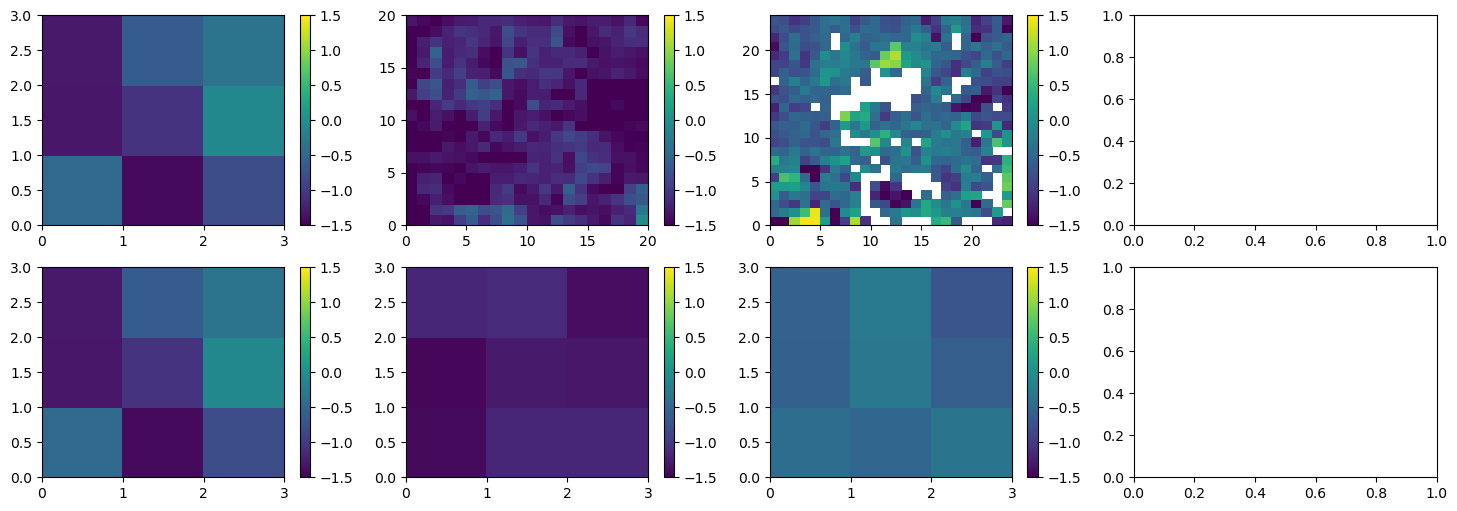

In [98]:
t=pd.Timestamp(2021,5,1)

fig, axs = plt.subplots(2,4,figsize=(18,6))
bb = cdi_bb.data_ds#.sel(time=t,method='nearest')

c1=axs[0][0].pcolor(bb.spg03.shift({'time':-3}).sel(time=t,method='nearest'),vmin=-1.5,vmax=1.5)
c5=axs[1][0].pcolor(cdi_bb.spi.data_ds.spg03.sel(time=t,method='nearest'),vmin=-1.5,vmax=1.5)
fig.colorbar(c1,ax=axs[0][0])
fig.colorbar(c5,ax=axs[1][0])

d1 = bb.smant.shift({'time':-2}).sel(time=t,method='nearest')
d2 = cdi_bb.sma.data_ds.smant.sel(time=t,method='nearest')

c1=axs[0][1].pcolor(d2,vmin=-1.5,vmax=1.5)
c5=axs[1][1].pcolor(utils.regrid_like(d2,d1),vmin=-1.5,vmax=1.5)
fig.colorbar(c1,ax=axs[0][1])
fig.colorbar(c5,ax=axs[1][1])

d1 = bb.fpanv.shift({'time':-2}).sel(time=t,method='nearest')
d2 = cdi_bb.fpr.data_ds.fpanv.sel(time=t,method='nearest')

c1=axs[0][2].pcolor(d2,vmin=-1.5,vmax=1.5)
c5=axs[1][2].pcolor(d3,vmin=-1.5,vmax=1.5)
fig.colorbar(c1,ax=axs[0][2])
fig.colorbar(c5,ax=axs[1][2])


# c3=axs[0][2].pcolor(bb.fpanv,vmin=-1.5,vmax=1.5)
# fig.colorbar(c3,ax=axs[0][2])

# c4=axs[0][3].pcolor(bb.CDI,vmin=0,vmax=4,cmap='Accent')
# fig.colorbar(c4,ax=axs[0][3])




In [44]:
print(cdi_bb.sma.data_ds.smant.sel({'latitude':38.5,'longitude':-118.5},method='nearest').isel(time=15).values)
print(cdi_pn.sma.data_ds.smant.sel({'latitude':38.5,'longitude':-118.5},method='nearest').isel(time=15).values)
print(cdi_bb.data_ds.smant.sel({'latitude':38.5,'longitude':-118.5},method='nearest').isel(time=15).values)
print(cdi_pn.data_ds.smant.sel({'latitude':38.5,'longitude':-118.5},method='nearest').isel(time=15).values)



-1.11
-1.1100000143051147
-0.6
-0.6000000238418579


In [13]:
da_sma = cdi_pt.sma.data_ds.smant
da = da_sma.reindex({'time': cdi_pt.time_dekads})
da.interp({'latitude'}=36,method='nearest')

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3356511062.py, line 3)

In [18]:
cdi_pt.process()

2023-06-19  09:26:25 INFO Computing Combined Drought Indicator...


Loading and trimmning data...
Filling gaps  in data...
Converting to dataframe...
Reducing to requested area...


2023-06-19  09:26:29 INFO Completed processing of ERA5 CDI data.


Generating output...


,latitude,longitude,time,spg03,smant,fpanv,CDI
0,36.5,-119.5,2020-12-01,NaN,NaN,NaN,NaN
1,36.5,-119.5,2020-12-11,NaN,NaN,NaN,NaN
2,36.5,-119.5,2020-12-21,NaN,NaN,NaN,NaN
3,36.5,-119.5,2021-01-01,-0.800,NaN,NaN,NaN
4,36.5,-119.5,2021-01-11,-0.800,NaN,NaN,NaN
...,...,...,...,...,...,...,...
85,36.5,-119.5,2023-04-11,1.143,NaN,2.941,NaN
86,36.5,-119.5,2023-04-21,1.143,NaN,3.698,NaN
87,36.5,-119.5,2023-05-01,0.745,NaN,3.445,NaN
88,36.5,-119.5,2023-05-11,0.745,NaN,1.880,NaN


In [75]:
sma_pt = dri.SMA_GDO(cf,aa_pt)
sma_bb = dri.SMA_GDO(cf,aa_bb)
sma_pn = dri.SMA_GDO(cf,aa_pn)
spi_pt = dri.SPI_GDO(cf,aa_pt)
spi_bb = dri.SPI_GDO(cf,aa_bb)
spi_pn = dri.SPI_GDO(cf,aa_pn)
fpr_pt = dri.FPAR_GDO(cf,aa_pt)
fpr_bb = dri.FPAR_GDO(cf,aa_bb)
fpr_pn = dri.FPAR_GDO(cf,aa_pn)

2023-06-16  16:46:55 INFO Successfully retrieved URL for GDO file with year: 2021, prod_code smant
2023-06-16  16:46:55 INFO Successfully retrieved URL for GDO file with year: 2022, prod_code smant
2023-06-16  16:46:55 INFO Couldn't retrieve URL for GDO file with year: 2023, prod_code smant
2023-06-16  16:46:55 INFO Successfully retrieved URL for GDO file with year: 2021, prod_code smant
2023-06-16  16:46:56 INFO Successfully retrieved URL for GDO file with year: 2022, prod_code smant
2023-06-16  16:46:56 INFO Couldn't retrieve URL for GDO file with year: 2023, prod_code smant
2023-06-16  16:46:56 INFO Successfully retrieved URL for GDO file with year: 2021, prod_code smant
2023-06-16  16:46:56 INFO Successfully retrieved URL for GDO file with year: 2022, prod_code smant
2023-06-16  16:47:02 INFO Couldn't retrieve URL for GDO file with year: 2023, prod_code smant
2023-06-16  16:47:02 INFO Successfully retrieved URL for GDO file with year: 2021, prod_code spg03
2023-06-16  16:47:02 INFO

In [76]:
sma_pt.download()
sma_bb.download()
sma_pn.download()

2023-06-16  16:47:42 INFO File already exists at: input/smant/smant_m_wld_20210101_20211221_t.nc
2023-06-16  16:47:42 INFO File already exists at: input/smant/smant_m_wld_20220101_20221101_t.nc
2023-06-16  16:47:42 INFO Could not download file: input/smant/smant_m_wld_20220101_20220921_t.nc
2023-06-16  16:47:42 INFO Error: HTTP Error 404: Not Found
2023-06-16  16:47:42 INFO File already exists at: input/smant/smant_m_wld_20210101_20211221_t.nc
2023-06-16  16:47:42 INFO File already exists at: input/smant/smant_m_wld_20220101_20221101_t.nc
2023-06-16  16:47:42 INFO Could not download file: input/smant/smant_m_wld_20220101_20220921_t.nc
2023-06-16  16:47:42 INFO Error: HTTP Error 404: Not Found
2023-06-16  16:47:42 INFO File already exists at: input/smant/smant_m_wld_20210101_20211221_t.nc
2023-06-16  16:47:42 INFO File already exists at: input/smant/smant_m_wld_20220101_20221101_t.nc
2023-06-16  16:47:43 INFO Could not download file: input/smant/smant_m_wld_20220101_20220921_t.nc
2023-0

['input/smant/smant_m_wld_20210101_20211221_t.nc',
 'input/smant/smant_m_wld_20220101_20221101_t.nc']

In [17]:
spi_pt.download()
spi_bb.download()
spi_pn.download()

2023-06-15  14:23:33 INFO File already exists at: input/spg03/spg03_m_wld_20210101_20211201_m.nc
2023-06-15  14:23:33 INFO File already exists at: input/spg03/spg03_m_wld_20220101_20221201_m.nc
2023-06-15  14:23:33 INFO File already exists at: input/spg03/spg03_m_wld_20220101_20221101_m.nc
2023-06-15  14:23:34 INFO Could not download file: input/spg03/spg03_m_wld_20220101_20220801_m.nc
2023-06-15  14:23:34 INFO Error: HTTP Error 404: Not Found
2023-06-15  14:23:34 INFO Downloaded file from GDO: input/spg03/spg03_m_wld_20230101_20230501_m.nc
2023-06-15  14:23:34 INFO File already exists at: input/spg03/spg03_m_wld_20210101_20211201_m.nc
2023-06-15  14:23:34 INFO File already exists at: input/spg03/spg03_m_wld_20220101_20221201_m.nc
2023-06-15  14:23:34 INFO File already exists at: input/spg03/spg03_m_wld_20220101_20221101_m.nc
2023-06-15  14:23:34 INFO Could not download file: input/spg03/spg03_m_wld_20220101_20220801_m.nc
2023-06-15  14:23:34 INFO Error: HTTP Error 404: Not Found
2023-

['input/spg03/spg03_m_wld_20210101_20211201_m.nc',
 'input/spg03/spg03_m_wld_20220101_20221201_m.nc',
 'input/spg03/spg03_m_wld_20220101_20221101_m.nc',
 'input/spg03/spg03_m_wld_20230101_20230501_m.nc']

In [18]:
fpr_pt.download()
fpr_bb.download()
fpr_pn.download()

2023-06-15  14:24:14 INFO File already exists at: input/fpanv/fpanv_m_wld_20210101_20211221_t.nc
2023-06-15  14:24:14 INFO File already exists at: input/fpanv/fpanv_m_wld_20220101_20221221_t.nc
2023-06-15  14:24:21 INFO Downloaded file from GDO: input/fpanv/fpanv_m_wld_20230101_20230521_t.nc
2023-06-15  14:24:21 INFO File already exists at: input/fpanv/fpanv_m_wld_20210101_20211221_t.nc
2023-06-15  14:24:21 INFO File already exists at: input/fpanv/fpanv_m_wld_20220101_20221221_t.nc
2023-06-15  14:24:21 INFO File already exists at: input/fpanv/fpanv_m_wld_20230101_20230521_t.nc
2023-06-15  14:24:21 INFO File already exists at: input/fpanv/fpanv_m_wld_20210101_20211221_t.nc
2023-06-15  14:24:21 INFO File already exists at: input/fpanv/fpanv_m_wld_20220101_20221221_t.nc
2023-06-15  14:24:21 INFO File already exists at: input/fpanv/fpanv_m_wld_20230101_20230521_t.nc


['input/fpanv/fpanv_m_wld_20210101_20211221_t.nc',
 'input/fpanv/fpanv_m_wld_20220101_20221221_t.nc',
 'input/fpanv/fpanv_m_wld_20230101_20230521_t.nc']

In [77]:
sma_pt.process()

Loading and trimmning data...
Filling gaps  in data...
Converting to dataframe...
Reducing to requested area...


,latitude,longitude,time,smant
0,38.55,-119.45,2021-01-21,-0.84
1,38.55,-119.45,2021-02-01,-0.11
2,38.55,-119.45,2021-02-11,-0.53
3,38.55,-119.45,2021-02-21,-1.65
4,38.55,-119.45,2021-03-01,-2.78
...,...,...,...,...
80,38.55,-119.45,2023-04-11,NaN
81,38.55,-119.45,2023-04-21,NaN
82,38.55,-119.45,2023-05-01,NaN
83,38.55,-119.45,2023-05-11,NaN


In [14]:
sma_bb.process()

,latitude,longitude,time,smant
0,38.55,-119.45,2021-01-21,-0.84
1,38.55,-119.45,2021-02-01,-0.11
2,38.55,-119.45,2021-02-11,-0.53
3,38.55,-119.45,2021-02-21,-1.65
4,38.55,-119.45,2021-03-01,-2.78
...,...,...,...,...
33995,40.45,-117.55,2023-04-11,NaN
33996,40.45,-117.55,2023-04-21,NaN
33997,40.45,-117.55,2023-05-01,NaN
33998,40.45,-117.55,2023-05-11,NaN


In [15]:
sma_pn.process()

Loading and trimmning data...
Filling gaps  in data...
Converting to dataframe...
Reducing to requested area...
Generating output...


2023-06-15  14:19:15 WARNING The CovJSON indenting option is no longer working - need to look at


,latitude,longitude,time,smant,mask
65,38.05,-119.45,2022-11-11,NaN,-99999.0
66,38.05,-119.45,2022-11-21,NaN,-99999.0
67,38.05,-119.45,2022-12-01,NaN,-99999.0
68,38.05,-119.45,2022-12-11,NaN,-99999.0
69,38.05,-119.45,2022-12-21,NaN,-99999.0
...,...,...,...,...,...
63745,40.45,-116.55,2023-04-11,NaN,-99999.0
63746,40.45,-116.55,2023-04-21,NaN,-99999.0
63747,40.45,-116.55,2023-05-01,NaN,-99999.0
63748,40.45,-116.55,2023-05-11,NaN,-99999.0


In [19]:
spi_pt.process()
spi_bb.process()
spi_pn.process()

2023-06-15  14:24:56 WARNING The CovJSON indenting option is no longer working - need to look at


Generating output...
Generating output...


2023-06-15  14:25:00 WARNING The CovJSON indenting option is no longer working - need to look at


Generating output...


,latitude,longitude,time,spg03,mask
0,38.5,-119.5,2021-02-01,-0.183,1.0
1,38.5,-119.5,2021-03-01,-0.201,1.0
2,38.5,-119.5,2021-04-01,-0.578,1.0
3,38.5,-119.5,2021-05-01,-0.473,1.0
4,38.5,-119.5,2021-06-01,-0.726,1.0
...,...,...,...,...,...
303,40.5,-117.5,2023-01-01,1.139,1.0
304,40.5,-117.5,2023-02-01,1.175,1.0
305,40.5,-117.5,2023-03-01,0.664,1.0
306,40.5,-117.5,2023-04-01,0.129,1.0


In [21]:
fpr_pt.process()
fpr_bb.process()
fpr_pn.process()

2023-06-15  14:27:19 WARNING Outfile not written: already exists


Generating output...


2023-06-15  14:27:21 WARNING Outfile not written: already exists


Generating output...


2023-06-15  14:27:23 WARNING The CovJSON indenting option is no longer working - need to look at


Generating output...


,latitude,longitude,time,fpanv,mask
1530,38.042,-117.958,2021-01-21,NaN,1.0
1531,38.042,-117.958,2021-02-01,NaN,1.0
1532,38.042,-117.958,2021-02-11,NaN,1.0
1533,38.042,-117.958,2021-02-21,NaN,1.0
1534,38.042,-117.958,2021-03-01,NaN,1.0
...,...,...,...,...,...
61195,40.458,-117.542,2023-04-11,-1.105,1.0
61196,40.458,-117.542,2023-04-21,-1.046,1.0
61197,40.458,-117.542,2023-05-01,-0.627,1.0
61198,40.458,-117.542,2023-05-11,-0.361,1.0


In [72]:
caa = config.CDIArgs(aa_pn.latitude,aa_pn.longitude,aa_pn.start_date,aa_pn.end_date,oformat='cov')
caa = config.CDIArgs([36],[-120],aa_pt.start_date,aa_pn.end_date,oformat='csv')


In [73]:
cdi = dri.CDI(cf,caa)
cdi.download()

2023-06-16  16:44:53 INFO Successfully retrieved URL for GDO file with year: 2020, prod_code spg03
2023-06-16  16:44:53 INFO Successfully retrieved URL for GDO file with year: 2021, prod_code spg03
2023-06-16  16:44:54 INFO Successfully retrieved URL for GDO file with year: 2022, prod_code spg03
2023-06-16  16:44:54 INFO Successfully retrieved URL for GDO file with year: 2023, prod_code spg03
2023-06-16  16:44:54 INFO Successfully retrieved URL for GDO file with year: 2021, prod_code smant
2023-06-16  16:44:54 INFO Successfully retrieved URL for GDO file with year: 2022, prod_code smant
2023-06-16  16:44:55 INFO Couldn't retrieve URL for GDO file with year: 2023, prod_code smant
2023-06-16  16:44:55 INFO Successfully retrieved URL for GDO file with year: 2021, prod_code fpanv
2023-06-16  16:44:55 INFO Successfully retrieved URL for GDO file with year: 2022, prod_code fpanv
2023-06-16  16:44:56 INFO Successfully retrieved URL for GDO file with year: 2023, prod_code fpanv
2023-06-16  16:

[['input/spg03/spg03_m_wld_20200101_20201201_m.nc',
  'input/spg03/spg03_m_wld_20210101_20211201_m.nc',
  'input/spg03/spg03_m_wld_20220101_20221201_m.nc',
  'input/spg03/spg03_m_wld_20220101_20221101_m.nc',
  'input/spg03/spg03_m_wld_20230101_20230501_m.nc'],
 ['input/smant/smant_m_wld_20210101_20211221_t.nc',
  'input/smant/smant_m_wld_20220101_20221101_t.nc'],
 ['input/fpanv/fpanv_m_wld_20210101_20211221_t.nc',
  'input/fpanv/fpanv_m_wld_20220101_20221221_t.nc',
  'input/fpanv/fpanv_m_wld_20230101_20230521_t.nc']]

In [79]:
cdi.process()

2023-06-16  17:03:30 INFO Computing Combined Drought Indicator...


Loading and trimmning data...
Filling gaps  in data...
Converting to dataframe...
Reducing to requested area...


2023-06-18  20:26:06 INFO Completed processing of ERA5 CDI data.


Generating output...


,latitude,longitude,time,spg03,smant,fpanv,CDI
0,52.5,1.5,2020-12-01,NaN,NaN,NaN,NaN
1,52.5,1.5,2020-12-11,NaN,NaN,NaN,NaN
2,52.5,1.5,2020-12-21,NaN,NaN,NaN,NaN
3,52.5,1.5,2021-01-01,1.296,NaN,NaN,NaN
4,52.5,1.5,2021-01-11,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
85,52.5,1.5,2023-04-11,NaN,NaN,NaN,NaN
86,52.5,1.5,2023-04-21,NaN,NaN,NaN,NaN
87,52.5,1.5,2023-05-01,0.032,NaN,NaN,NaN
88,52.5,1.5,2023-05-11,NaN,NaN,NaN,NaN
